In [2]:
import pandas as pd

weather = pd.read_csv("weatherstats_toronto_daily_final.csv", index_col="date")
weather


,max_temperature,avg_hourly_temperature,avg_temperature,min_temperature,max_humidex,min_windchill,max_relative_humidity,avg_hourly_relative_humidity,avg_relative_humidity,min_relative_humidity,...,avg_cloud_cover_4,min_cloud_cover_4,max_cloud_cover_8,avg_hourly_cloud_cover_8,avg_cloud_cover_8,min_cloud_cover_8,max_cloud_cover_10,avg_hourly_cloud_cover_10,avg_cloud_cover_10,min_cloud_cover_10
date,,,,,,,,,,,,,,,,,,,,,
2021-06-22,19.5,14.46,14.75,10.0,NaN,NaN,94,54.8,63.0,32,...,NaN,NaN,8,5.8,5.0,2,NaN,NaN,NaN,NaN
2021-06-23,23.7,17.55,16.25,8.8,NaN,NaN,79,53.1,57.0,35,...,NaN,NaN,6,3.4,3.5,1,NaN,NaN,NaN,NaN
2021-06-24,28.1,22.42,22.00,15.9,30.0,NaN,70,50.5,51.0,32,...,NaN,NaN,8,5.8,5.0,2,NaN,NaN,NaN,NaN
2021-06-25,25.8,21.24,22.30,18.8,30.0,NaN,100,74.0,75.0,50,...,NaN,NaN,8,7.7,6.5,5,NaN,NaN,NaN,NaN
2021-06-26,27.5,23.97,23.25,19.0,36.0,NaN,100,82.5,83.0,66,...,NaN,NaN,8,7.8,7.5,7,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-13,20.6,12.32,12.75,4.9,NaN,NaN,86,54.7,52.5,19,...,NaN,NaN,7,2.1,3.5,0,NaN,NaN,NaN,NaN
2024-03-14,11.4,7.01,6.90,2.4,NaN,NaN,100,76.9,78.0,56,...,NaN,NaN,8,6.8,5.0,2,NaN,NaN,NaN,NaN
2024-03-15,12.9,6.32,6.20,-0.5,NaN,NaN,100,81.9,78.5,57,...,NaN,NaN,8,7.1,5.5,3,NaN,NaN,NaN,NaN


In [7]:
core_weather = weather[["min_temperature", "max_temperature", "precipitation", "rain", "snow"]].copy()
core_weather.apply(pd.isnull).sum()

min_temperature    0
max_temperature    0
precipitation      5
rain               7
snow               5
dtype: int64

In [10]:
core_weather = core_weather.fillna(method="ffill")

In [12]:
core_weather.apply(pd.isnull).sum()


min_temperature    0
max_temperature    0
precipitation      0
rain               0
snow               0
dtype: int64

<Axes: xlabel='date'>

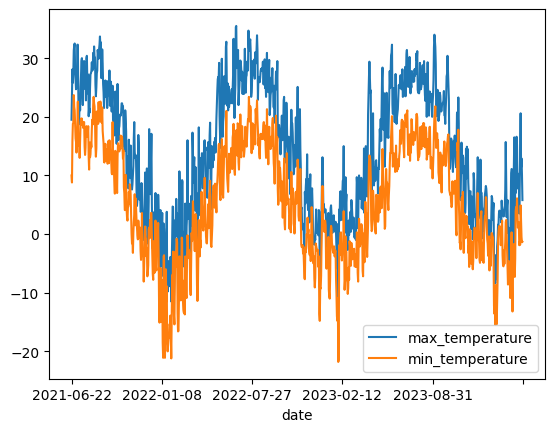

In [13]:
core_weather[["max_temperature", "min_temperature"]].plot()

<Axes: xlabel='date'>

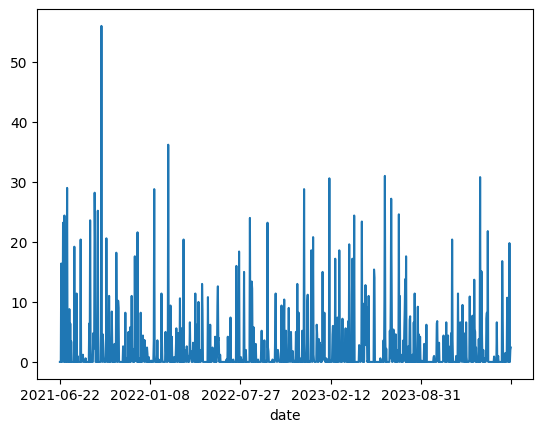

In [14]:
core_weather["precipitation"].plot()

In [16]:
core_weather.index = pd.to_datetime(core_weather.index)


In [18]:
core_weather["target"] = core_weather.shift(-1)["max_temperature"]


In [19]:
core_weather

,min_temperature,max_temperature,precipitation,rain,snow,target
date,,,,,,
2021-06-22,10.0,19.5,0.0,0.0,0.0,23.7
2021-06-23,8.8,23.7,0.0,0.0,0.0,28.1
2021-06-24,15.9,28.1,0.0,0.0,0.0,25.8
2021-06-25,18.8,25.8,16.4,16.4,0.0,27.5
2021-06-26,19.0,27.5,5.6,5.6,0.0,31.3
...,...,...,...,...,...,...
2024-03-13,4.9,20.6,0.0,0.0,0.0,11.4
2024-03-14,2.4,11.4,19.8,19.8,0.0,12.9
2024-03-15,-0.5,12.9,0.0,0.0,0.0,10.1


In [20]:
core_weather = core_weather.iloc[:-1,:].copy()


In [21]:
core_weather

,min_temperature,max_temperature,precipitation,rain,snow,target
date,,,,,,
2021-06-22,10.0,19.5,0.0,0.0,0.0,23.7
2021-06-23,8.8,23.7,0.0,0.0,0.0,28.1
2021-06-24,15.9,28.1,0.0,0.0,0.0,25.8
2021-06-25,18.8,25.8,16.4,16.4,0.0,27.5
2021-06-26,19.0,27.5,5.6,5.6,0.0,31.3
...,...,...,...,...,...,...
2024-03-12,-1.8,14.3,0.0,0.0,0.0,20.6
2024-03-13,4.9,20.6,0.0,0.0,0.0,11.4
2024-03-14,2.4,11.4,19.8,19.8,0.0,12.9


In [22]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)


In [23]:
predictors = ["min_temperature", "max_temperature",	"precipitation", "rain", "snow"]
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-01-01":]
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [25]:
predictions = reg.predict(test[predictors])

from sklearn.metrics import mean_absolute_error

mean_absolute_error(test["target"], predictions)

3.1593353100976853

In [27]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
date,,
2023-01-01,5.1,7.383546
2023-01-02,4.0,8.093249
2023-01-03,3.7,6.426688
2023-01-04,4.2,5.066954
2023-01-05,4.2,7.599752
...,...,...
2024-03-12,20.6,11.935487
2024-03-13,11.4,18.203818
2024-03-14,12.9,9.731255


<Axes: xlabel='date'>

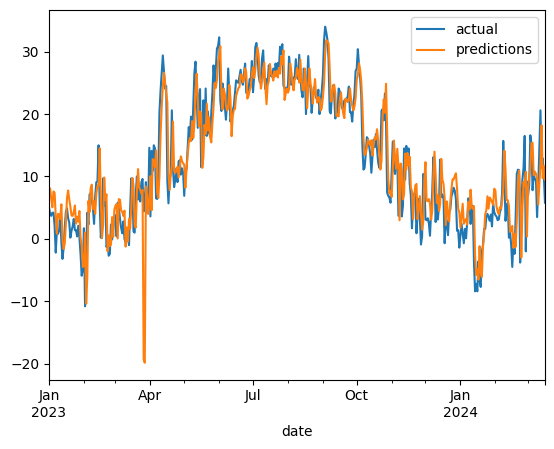

In [29]:
combined.plot()

In [30]:
reg.coef_

array([ 0.39390864,  0.57605434,  1.41636797, -1.52687764, -1.54745447])

In [42]:
def create_predictions(predictions, core_weather, reg):
    train = core_weather.loc[:"2022-12-31"]
    test = core_weather.loc["2023-01-01":]  
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined